In [1]:
# Ken Chen Created this for Numerical Evaluationm

In [159]:
from utils.utils import get_min_dis_of_surface, get_min_distance
import os
import numpy as np
import pandas as pd
from scipy import stats, integrate
import seaborn as sns
import matplotlib.pyplot as plt

In [160]:
# extract plddt binder
def extract_data_from_sc(filename):
    data = {}
    with open(filename, 'r') as file:
        lines = file.readlines()

        # find the head line
        for line in lines:
            if line.startswith('SCORE:'):
                header = line.strip().split()
                break

        for line in lines:
            if line.startswith('SCORE:'):
                line_data = line.strip().split()
                description = line_data[-1]

                plddt_binder_index = header.index('plddt_binder')
                
                if description == 'description':
                    continue

                plddt_binder = float(line_data[plddt_binder_index])

                data[description+'.pdb'] = plddt_binder

    return data

filename = './out_1.2_500.sc'
data = extract_data_from_sc(filename)
# print(data)


In [161]:
# path: dir of pdb
path_dir = "./1.2-500/"
files = os.listdir(path_dir)

In [162]:
# select the pdb based on min_dis(point)
def selected_basedon_lim_point(lim_p):
    # select the plddt of pdb whose dis_p is less than lim_p
    ret = []
    for f in files:
        path = path_dir + f
        d = get_min_distance(path)
        if d <= lim_p:
            ret.append(data[f])
            # print(f'f: {f}, data: {data[f]}, d: {d}')
    return ret

# select the pdb based on min_dis(surface)
def selected_basedon_lim_surface(lim_s):
    # select the plddt of pdb whose dis_s is less than lim_s
    ret = []
    for f in files:
        path = path_dir + f
        d = get_min_dis_of_surface(path)
        if d <= lim_s:
            ret.append(data[f])
            # print(f'f: {f}, data: {data[f]}, d: {d}')
    return ret

In [163]:
# for score, calculate based on plddt binder of .sc file
lim_point_list = [i for i in np.arange(7, 10.7, 0.2)]
lim_surface_list = [i for i in np.arange(4, 7.7, 0.2)]
# print(lim_point_list)

C = 0.1

In [165]:
# score for points
scores_point = []
for lim_p in lim_point_list:
    select = []
    select = selected_basedon_lim_point(lim_p)
    # print(select)
    N = len(select)

    if N == 0:
        scores_point.append(-1)
        print(-1)
        continue
    
    # sum(1/plddt)/N + Cx1/N
    sum_plddt = sum([1./plddt for plddt in select])
    loss = float(sum_plddt/N)
    score = loss + C * 1./N
    # print(loss)
    # print(score)
    scores_point.append(score)
    print(f'point, lim_p:{lim_p:.1f}, loss: {loss}, score: {score}, N: {N}')

point, lim_p:7.0, loss: 0.012106447006612508, score: 0.01325587229396883, N: 87
point, lim_p:7.2, loss: 0.012081738466936469, score: 0.013052612253344236, N: 103
point, lim_p:7.4, loss: 0.012184228541214478, score: 0.013038929395915333, N: 117
point, lim_p:7.6, loss: 0.012388767600845178, score: 0.013176169175648327, N: 127
point, lim_p:7.8, loss: 0.012361318339872683, score: 0.013096612457519741, N: 136
point, lim_p:8.0, loss: 0.01233683307206459, score: 0.01303613377136529, N: 143
point, lim_p:8.2, loss: 0.012367726585876895, score: 0.013025621322719, N: 152
point, lim_p:8.4, loss: 0.012358056127350851, score: 0.012986986944960914, N: 159
point, lim_p:8.6, loss: 0.012329900129878274, score: 0.01293596073593888, N: 165
point, lim_p:8.8, loss: 0.01236703870013046, score: 0.012955273994248106, N: 170
point, lim_p:9.0, loss: 0.01249924166211699, score: 0.013057900879994084, N: 179
point, lim_p:9.2, loss: 0.012481846454065124, score: 0.013010946983165652, N: 189
point, lim_p:9.4, loss: 0.

In [167]:
# scores for surface
scores_surface = []
for lim_s in lim_surface_list:
    select = []
    select = selected_basedon_lim_surface(lim_s)
    N = len(select)

    if N == 0:
        scores_surface.append(-1)
        print(-1)
        continue

    # sum(1/plddt)/N + Cx1/N
    sum_plddt = sum([1./plddt for plddt in select])
    loss = float(sum_plddt/N)
    score = loss + C * 1./N
    # print(loss)
    # print(score)
    scores_surface.append(score)
    print(f'surface, lim_s:{lim_s:.1f}, loss: {loss}, score: {score}, N: {N}')

surface, lim_s:4.0, loss: 0.012627562139025331, score: 0.013544993331685882, N: 109
surface, lim_s:4.2, loss: 0.012624303209990369, score: 0.013457636543323702, N: 120
surface, lim_s:4.4, loss: 0.01255795216002949, score: 0.013321310938655444, N: 131
surface, lim_s:4.6, loss: 0.01254575872491635, score: 0.01327039640607577, N: 138
surface, lim_s:4.8, loss: 0.012560268926762992, score: 0.013231409866360308, N: 149
surface, lim_s:5.0, loss: 0.012530599815777324, score: 0.013184194587019154, N: 153
surface, lim_s:5.2, loss: 0.012548931037710431, score: 0.013166214988327716, N: 162
surface, lim_s:5.4, loss: 0.012534251642964817, score: 0.013136661281519033, N: 166
surface, lim_s:5.6, loss: 0.012510340618275257, score: 0.013102056594606618, N: 169
surface, lim_s:5.8, loss: 0.012491572735695922, score: 0.013050231953573016, N: 179
surface, lim_s:6.0, loss: 0.012487673677864148, score: 0.013022433036152917, N: 187
surface, lim_s:6.2, loss: 0.012572846656665703, score: 0.013080460869863673, N:

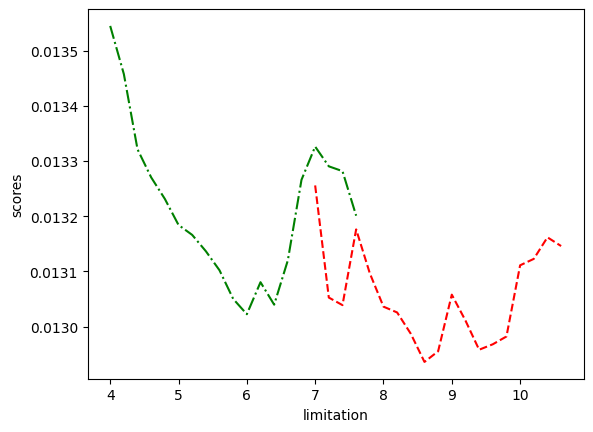

In [168]:
# plot
plt.plot(lim_point_list, scores_point, color='r', linestyle='--', label='point')
plt.plot(lim_surface_list, scores_surface, color='g', linestyle='-.', label='surface')
plt.xlabel('limitation')
plt.ylabel('scores')
plt.show()

In [169]:
files = os.listdir(path_dir)

diff = []
for f in files:
    path = path_dir + f
    d1 = get_min_dis_of_surface(path)
    d2 = get_min_distance(path)
    diff.append(d2 - d1)

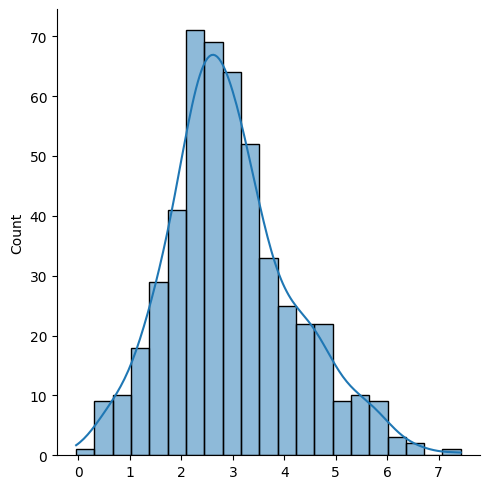

In [170]:
sns.displot(diff, kde=True)